In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Moves one directory up
sys.path.append(project_root)

from analytical_solution.utils import *
from analytical_solution.analytical_equations import bernardes_eq, markov_approach, including_fusion
from analytical_solution.monte_carlo import monte_carlo

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
#Constants
segments = 4; vertices = segments+1
sim_count = 10000

So the grid would look like,

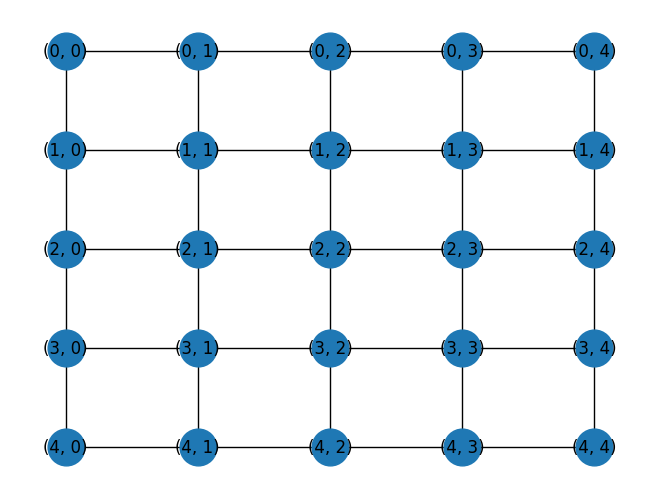

In [3]:
G = nx.grid_2d_graph(vertices, vertices)
pos = {(x, y): (y, -x) for x, y in G.nodes()}
nx.draw(G, pos, with_labels=True, node_size=700)

Before we present our novel results which include fusion, we recreate the published results for non-deterministic (p < 1) entanglement generation success and non-deterministic swap. The first has been published by Bernades et al and the second by Shchukin and Brand independently.

##### Non-deterministic p

In [4]:
p = 0.1; q = 1; k = 1
bernades = bernardes_eq(manhattan_distance(segments), p)
mc = monte_carlo(segments, sim_count, sim_count, p, 1, 1)

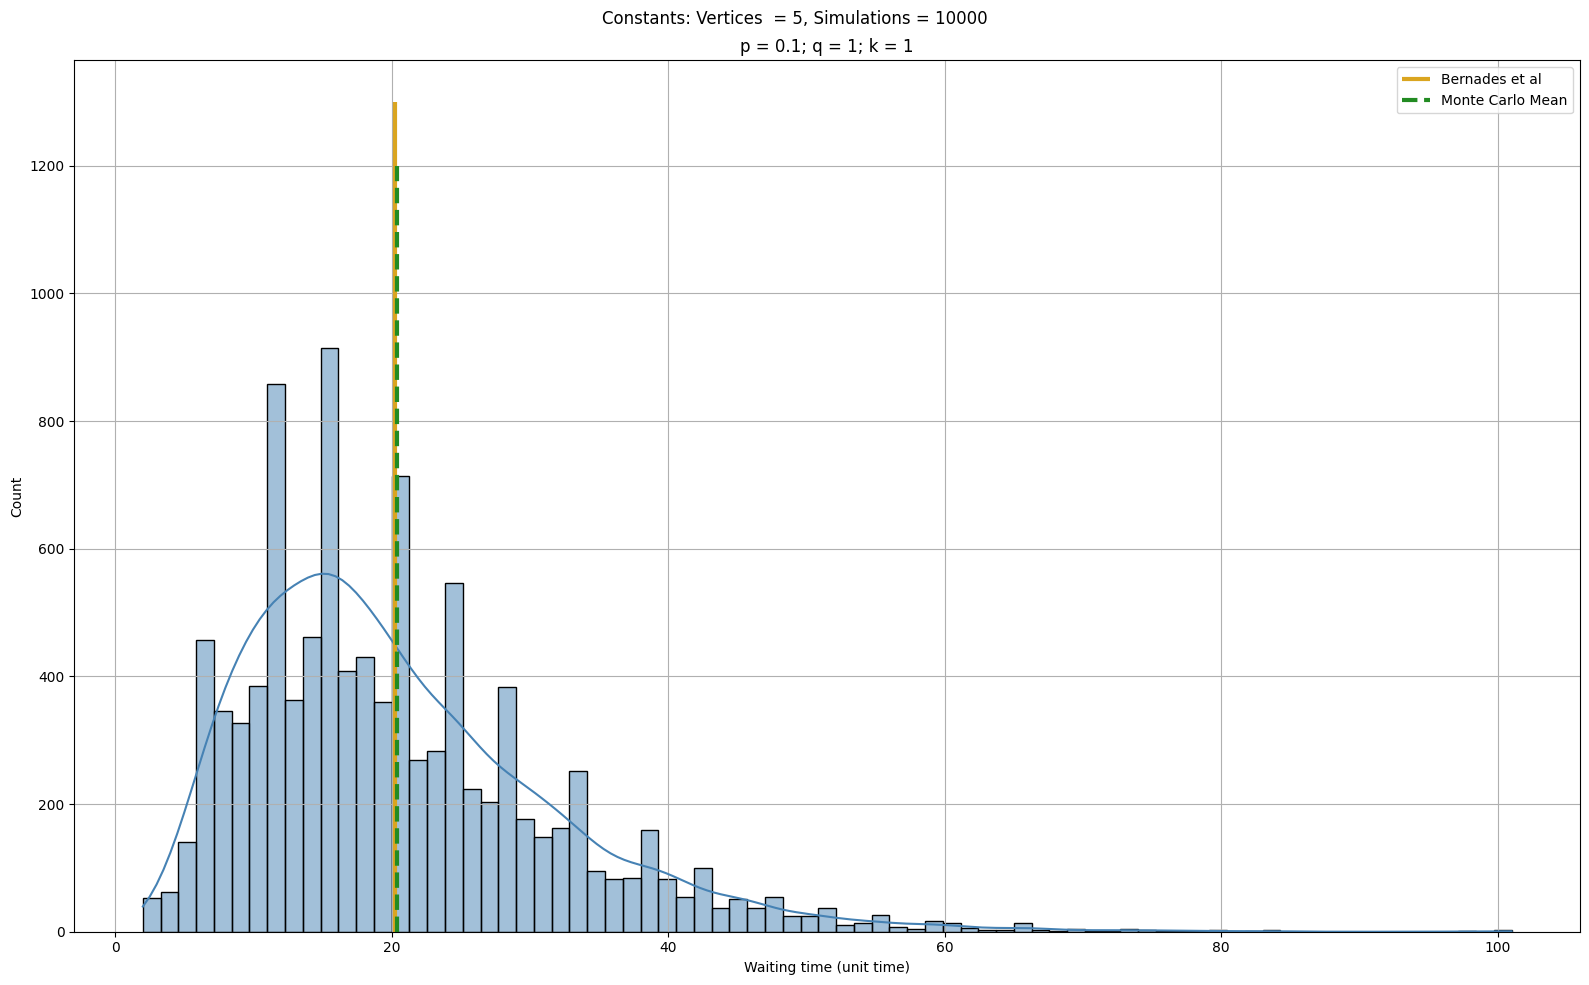

In [5]:
fig, ax = plt.subplots(figsize = (16, 10))

sns.histplot(mc, ax = ax, kde = True, color = 'steelblue')
ax.vlines(bernades, 0, 1300, colors='goldenrod', label = 'Bernades et al', linewidth = 3)
ax.vlines(np.mean(mc), 0, 1200, colors='forestgreen', label = 'Monte Carlo Mean', linewidth = 3, linestyle = "dashed")
ax.set_xlabel("Waiting time (unit time)")
ax.set_ylabel("Count")
ax.set_title(f"p = {p}; q = {q}; k = {k}")
ax.legend(loc = 'best')
ax.grid(True)


plt.suptitle(f"Constants: Vertices  = {vertices}, Simulations = {sim_count}")

plt.tight_layout()

We clearly see that the Monte-Carlo simulation provided by Brand works well with non-deterministic $p$.

##### Non-deterministic p & q

In [6]:
p = 0.1
q = 0.9
k = 1

mc = monte_carlo(segments, sim_count, sim_count, p, q, k)

shchukin_vals = markov_approach(segments, p, q)

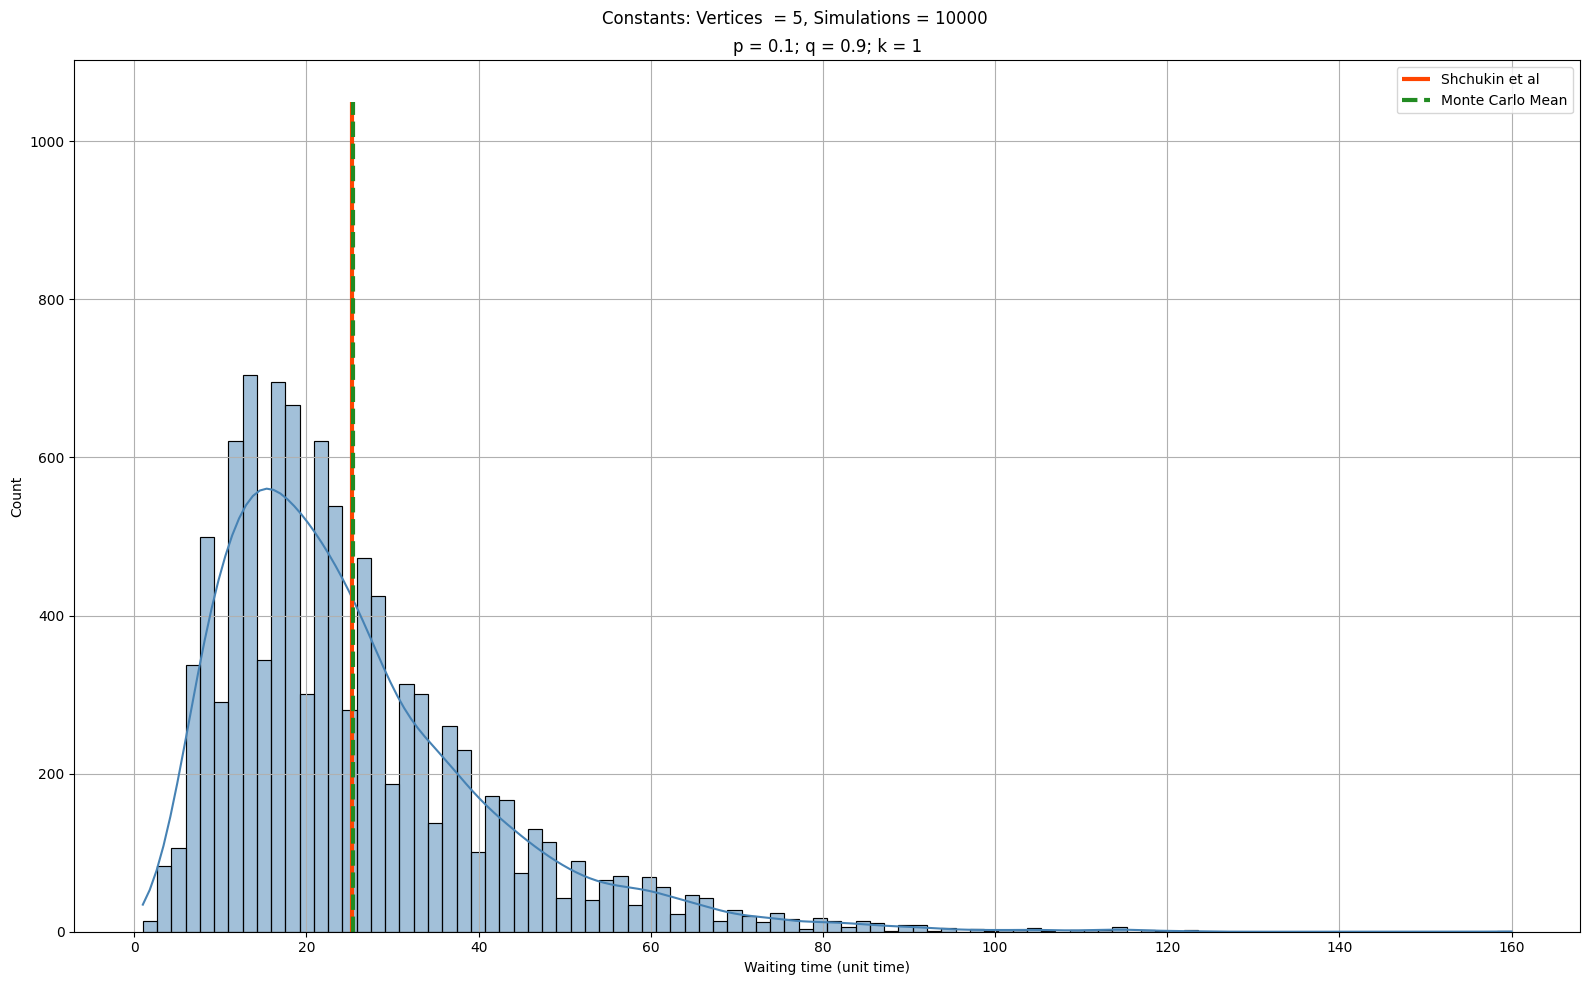

In [7]:
fig, ax = plt.subplots(figsize = (16, 10))

sns.histplot(mc, ax = ax, kde = True, color = 'steelblue')
ax.vlines(shchukin_vals, 0, 1050, colors ='orangered', label = 'Shchukin et al', linewidth = 3)
ax.vlines(np.mean(mc), 0, 1050, colors='forestgreen', label = 'Monte Carlo Mean', linewidth = 3, linestyle = "dashed")
ax.set_xlabel("Waiting time (unit time)")
ax.set_ylabel("Count")
ax.set_title(f"p = {p}; q = {q}; k = {k}")
ax.legend(loc = 'best')
ax.grid(True)

plt.suptitle(f"Constants: Vertices  = {vertices}, Simulations = {sim_count}")

plt.tight_layout()

Clearly, we see that the Shchukin model and the Brand model (which we will now call the Markov Chain and the Monte-Carlo simulation), align well for the stated values of the number of segments.

##### Including Fusion

We now present our novel solution introducing fusion to the Markov Chain and Monte-Carlo simulations. Further we will present some other methods of quantifying the latency, with the different of the new approach having an experimental base rather than theoretical.

In [8]:
p = 0.1
q = 0.9
k = 0.3

t_all, tp, tq, tk = monte_carlo(segments, sim_count, sim_count, p, q, k, ind = True)
fusion_vals = including_fusion(segments, p, q, k)

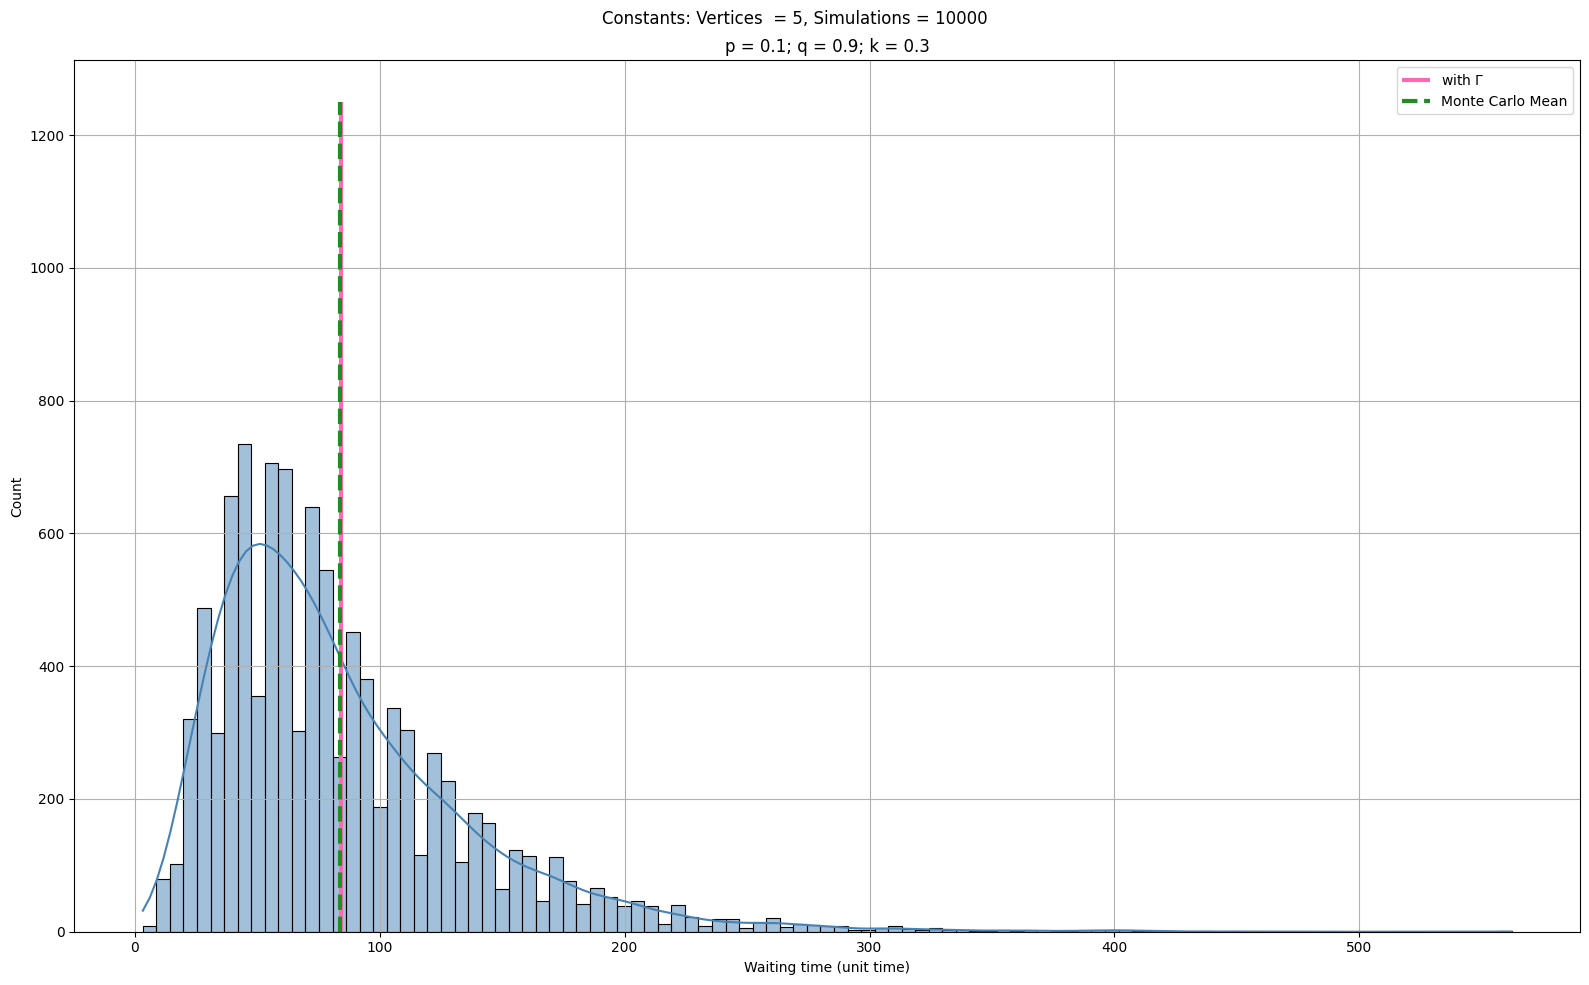

In [9]:
fig, ax = plt.subplots(figsize = (16, 10))

sns.histplot(tp, ax = ax, kde = True, color = 'steelblue')
ax.vlines(fusion_vals, 0, 1250, colors ='hotpink', label = r'with $\Gamma$', linewidth = 3)
ax.vlines(np.mean(tp), 0, 1250, colors='forestgreen', label = 'Monte Carlo Mean', linewidth = 3, linestyle = "dashed")
ax.set_xlabel("Waiting time (unit time)")
ax.set_ylabel("Count")
ax.set_title(f"p = {p}; q = {q}; k = {k}")
ax.legend(loc = 'best')
ax.grid(True)


plt.suptitle(f"Constants: Vertices  = {vertices}, Simulations = {sim_count}")

plt.tight_layout()